In [1]:
import tweepy
import pandas as pd
import config
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [2]:
consumer_key="####"
consumer_secret="###"
access_token="####"
access_token_secret="####"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [4]:
tweets = api.search('oneplusz', count=500)
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Here are 6 confirmed details of the affordable Oneplus smart TV series
Pete Lau’s CEO of OnePlus has confirmed that… https://t.co/wfBipqJ09I

This Could be the OnePlus Z - Dual Camera?
#OnePlusZ #OnePlus #onepluszlivephoto #unboxlogy https://t.co/CEAquv1dkn

OnePlus Z - May debut as OnePlus Nord https://t.co/CVzQiEdUHF via @YouTube @OnePlus_IN @oneplus @OnePlusZ #OnePlusZ #OnePlusNord

Oneplus "Z" or "Nord" real image of hand on leaked
#OnePlusZ #OnePlus #oneplusnord https://t.co/go68fWMsYl

RT @Ashim680: @OnePlus_IN @oneplus Sir, When will the Oneplus Z(Nord) arrive?  We're eagerly waiting for it... Please let us know!!
Lot's o…



In [5]:
tw=[]
for t in tweets:
        tw.append(t.text)
        

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [7]:
df=clean_tweets (tw)

In [8]:
dff=[]
for i in df:
    i=i.lower()
    j=i.replace('oneplus',"")
    z=j.replace('&amp;',"")
    d=z.replace('z',"")
    dff.append(d)

In [9]:
#since one plus impacts the sentiment, we can avoid it

In [10]:
df=pd.DataFrame(dff,columns=['Tweets'])

In [11]:
df['len'] = np.array([len(tweet.text) for tweet in tweets])
df['ID'] = np.array([tweet.id for tweet in tweets])
df['Date'] =np.array([tweet.created_at for tweet in tweets])
df['Source'] = np.array([tweet.source for tweet in tweets])
df['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
df['RT'] = np.array([tweet.retweet_count for tweet in tweets])

In [12]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
df['SA'] = np.array([analyze_sentiment(tweet) for tweet in df["Tweets"]])
df.head()

,Tweets,len,ID,Date,Source,Likes,RT,SA
0,here are 6 confirmed details of the affordable...,140,1271846187297996802,2020-06-13 16:45:35,Twitter Web App,0,0,1
1,this could be the - dual camera?\n# # #livep...,115,1271837506535739393,2020-06-13 16:11:05,Twitter for Android,0,0,0
2,- may debut as nord via # #nord,128,1271830009305432064,2020-06-13 15:41:18,Twitter Web App,0,0,0
3,""""" or ""nord"" real image of hand on leaked\n# ...",106,1271808207736930305,2020-06-13 14:14:40,Twitter for Android,2,0,1
4,"sir, when will the (nord) arrive? we're e...",140,1271799299697856512,2020-06-13 13:39:16,Twitter Web App,0,1,0


In [13]:
#To prepare the list of positive, negative and neutral tweets
positive =[]
negative =[]
neutral =[]
for value in df['SA']:
    if value >0:
        positive.append(df['Tweets'])
    elif value <0:
        negative.append(df['Tweets'])
    else:
        neutral.append(df['Tweets'])

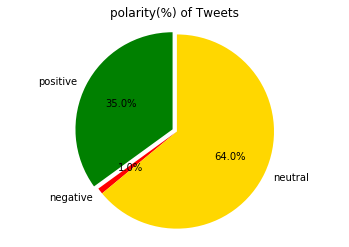

In [14]:
# to plot polarity(%) of PM's tweet
tweet_count =[len(positive),len(negative),len(neutral)]
labels = ["positive", "negative", "neutral"]
colors =['g','r','gold']
explode=(0.05,0,0)
plt.pie(tweet_count,labels=labels,explode=explode,colors=colors, autopct="%0.1f%%", startangle=90)
plt.title("polarity(%) of Tweets")
plt.axis("equal")
plt.show()

In [15]:
#with little advertising, we can change the neutral views into positive

In [16]:
pos_word =' '.join([text for text in df['Tweets'][df['SA'] == 1]])
neutral_word=' '.join([text for text in df['Tweets'][df['SA'] == 0]])
neg_word=' '.join([text for text in df['Tweets'][df['SA'] == -1]])

(-0.5, 799.5, 499.5, -0.5)

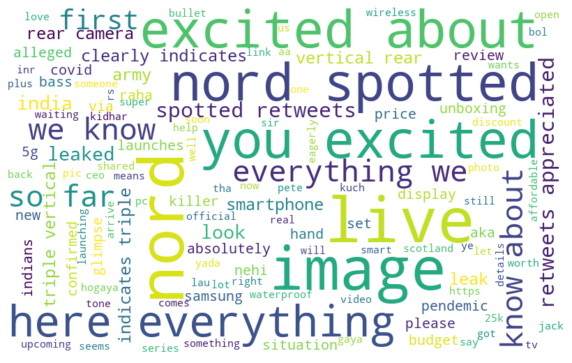

In [17]:
#Generate wordcloud of positive tweets
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=800, height=500, background_color='white',stopwords=stopwords, max_font_size=90).generate(pos_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')


In [18]:
#with oneplus not making an official anouncement, we can see the new phone name(nord) being popped.

(-0.5, 799.5, 499.5, -0.5)

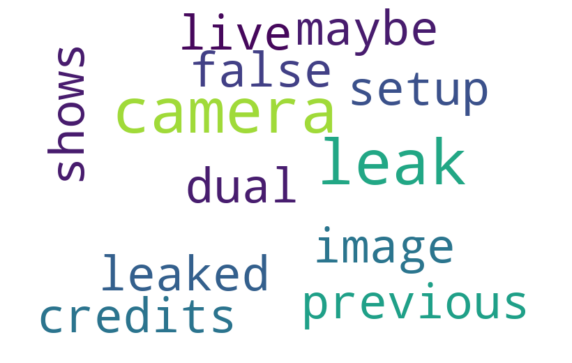

In [19]:
#Generate wordcloud of positive tweets
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=800, height=500, background_color='white',stopwords=stopwords, max_font_size=90).generate(neg_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')


(-0.5, 799.5, 499.5, -0.5)

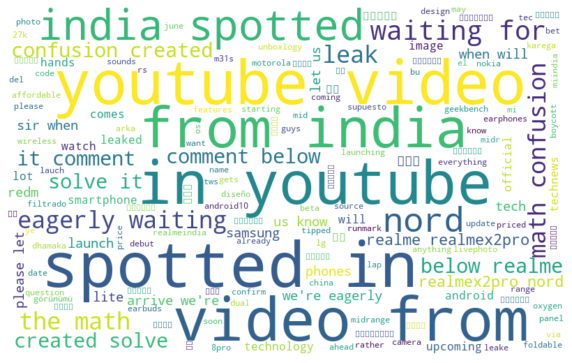

In [20]:
#wordcloud of neutral tweets
wordcloud2 = WordCloud(width=800, height=500,  max_font_size=90, background_color='white').generate(neutral_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')


In [21]:
fav_max = np.max(df['Likes'])
rt_max = np.max(df['RT'])
fav_min = np.min(df['Likes'])
fav = df[df.Likes == fav_max].index[0]
rt = df[df.RT == rt_max].index[0]
fav_tweet = df['Tweets'][fav]
rt_tweet = df['Tweets'][rt]
least_fav = df['Tweets'][fav_min]

In [22]:
print(f"The tweet with maximum likes is : \n{fav_tweet}")
print(f"Number of likes: {fav_max}")
print(f"\nThe tweet with more retweets is: \n{rt_tweet}")
print(f"Number of retweets: {rt_max}")
print(f"\nThe tweet with minimum likes is : \n{least_fav}")
print(f"Number of likes: {fav_min}")

The tweet with maximum likes is : 
are you excited about the #? here's everything we know about it so far! 
Number of likes: 152

The tweet with more retweets is: 
 # - # -   - spotted in a youtube video from india  
Number of retweets: 58

The tweet with minimum likes is : 
here are 6 confirmed details of the affordable  smart tv series
pete lau’s ceo of  has confirmed that… 
Number of likes: 0


Text(0.5, 0, 'Tweet Count')

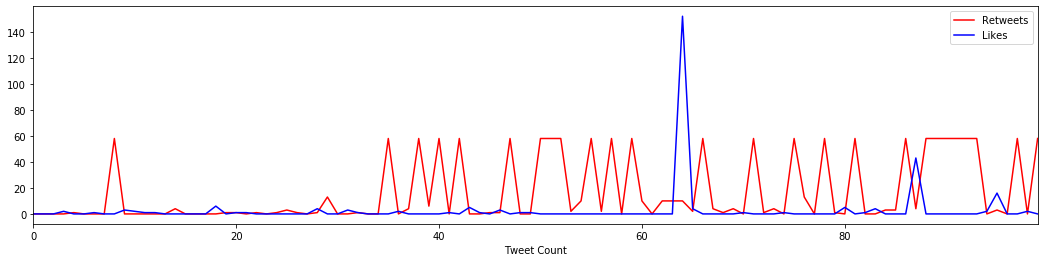

In [23]:
#To plot the retweets and likes on PM's tweet
RT_t = pd.Series(data = df['RT'].values)
fav_t = pd.Series(data = df['Likes'].values)
RT_t.plot(figsize =(18,4),label="Retweets", color ='r',legend=True)
fav_t.plot(figsize=(18,4), label="Likes", color = 'b', legend=True)
plt.xlabel("Tweet Count")


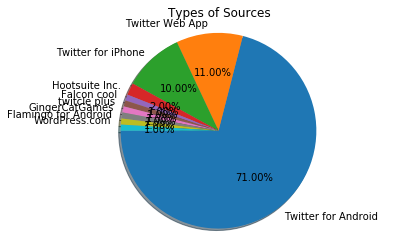

In [24]:
# Sources of tweet
Sources = df['Source'].value_counts()
plt.pie(Sources.values,labels=Sources.index, startangle=180, autopct='%.2f%%', shadow=True)
plt.axis("equal")
plt.title("Types of Sources")
plt.show()

In [25]:
# the most tweets have come from adroid phones, iphone users interaction is low.So chanes of iphone to android device will be low